In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from datetime import datetime

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
plt.style.use('seaborn')

# Setup and Inspection

In [2]:
df = pd.read_csv('life.csv')

In [3]:
df.shape

(2938, 22)

In [4]:
df['Life expectancy '].describe()

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy , dtype: float64

In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

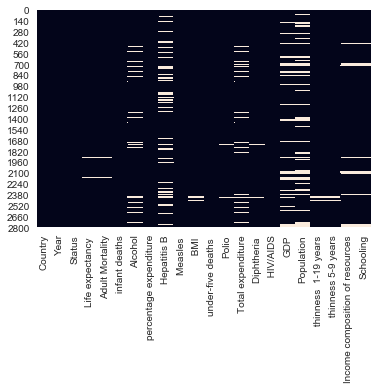

In [6]:
sns.heatmap(df.isna(), cbar=False)

In [7]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
corr = df.corr()

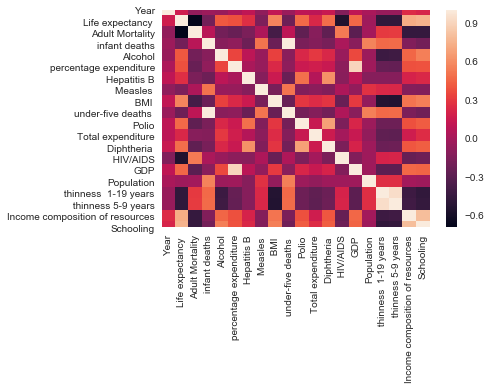

In [9]:
sns.heatmap(corr)

# Dropping and Imputing

In [10]:
df2 = df.drop(columns=['Hepatitis B'])

In [11]:
df2.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Measles ',
       ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## Imputing

In [12]:
df2.Population = df.Population.fillna(df.Population.median())

In [13]:
df2.GDP = df.GDP.fillna(df.GDP.median())

In [14]:
df2.Schooling = df.Schooling.fillna(df.Schooling.median())

In [15]:
df2['Total expenditure'] = df['Total expenditure'].fillna(df['Total expenditure'].median())

In [16]:
df2['Income composition of resources'] = df['Income composition of resources'].fillna(df['Income composition of resources'].median())

In [17]:
df2.Alcohol = df.Alcohol.fillna(df.Alcohol.median())

## Dropping

In [18]:
df2 = df2.dropna(subset =['Life expectancy ',])

In [19]:
df2 = df2.dropna()

In [20]:
df2.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [21]:
corr = df2.corr()

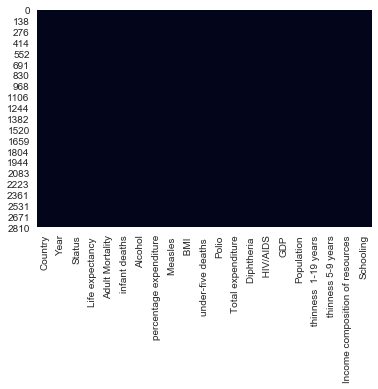

In [22]:
sns.heatmap(df2.isna(), cbar=False)

In [23]:
df2.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [24]:
renamed = []
for i in df2.columns:
    renamed.append(i.lower().strip().replace(' ', '_').replace('-','_').replace('/','_'))

In [25]:
rename_dict = dict(zip(df2.columns, renamed))

In [26]:
rename_dict

{'Country': 'country',
 'Year': 'year',
 'Status': 'status',
 'Life expectancy ': 'life_expectancy',
 'Adult Mortality': 'adult_mortality',
 'infant deaths': 'infant_deaths',
 'Alcohol': 'alcohol',
 'percentage expenditure': 'percentage_expenditure',
 'Measles ': 'measles',
 ' BMI ': 'bmi',
 'under-five deaths ': 'under_five_deaths',
 'Polio': 'polio',
 'Total expenditure': 'total_expenditure',
 'Diphtheria ': 'diphtheria',
 ' HIV/AIDS': 'hiv_aids',
 'GDP': 'gdp',
 'Population': 'population',
 ' thinness  1-19 years': 'thinness__1_19_years',
 ' thinness 5-9 years': 'thinness_5_9_years',
 'Income composition of resources': 'income_composition_of_resources',
 'Schooling': 'schooling'}

In [27]:
df2.rename(columns=rename_dict, inplace=True)

In [28]:
shorten = {'life_expectancy':'lifex', \
           'percentage_expenditure':'perc_expend', \
           'total_expenditure':'tot_expend', \
          'population':'pop','income_composition_of_resources':'income_comp'}

In [29]:
df2.rename(columns=shorten, inplace=True)

In [30]:
df2

,country,year,status,lifex,adult_mortality,infant_deaths,alcohol,perc_expend,measles,bmi,under_five_deaths,polio,tot_expend,diphtheria,hiv_aids,gdp,pop,thinness__1_19_years,thinness_5_9_years,income_comp,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Feature Engineering

In [31]:
# df2['gdp_capita'] = df2['gdp']/df2['pop']*1000000     DID NOT WORK
# df2['gdp_rat_expend'] = df2['gdp']*df2['tot_expend']   BARELY WORKED, NOT WORTH COMPLEXITY

In [32]:
df2

,country,year,status,lifex,adult_mortality,infant_deaths,alcohol,perc_expend,measles,bmi,under_five_deaths,polio,tot_expend,diphtheria,hiv_aids,gdp,pop,thinness__1_19_years,thinness_5_9_years,income_comp,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Transformation and Scaling

In [33]:
# df2['loglife'] = np.log(df['Life expectancy '])

# EDA and Visuals/Correlations

In [34]:
corr = df2.corr()

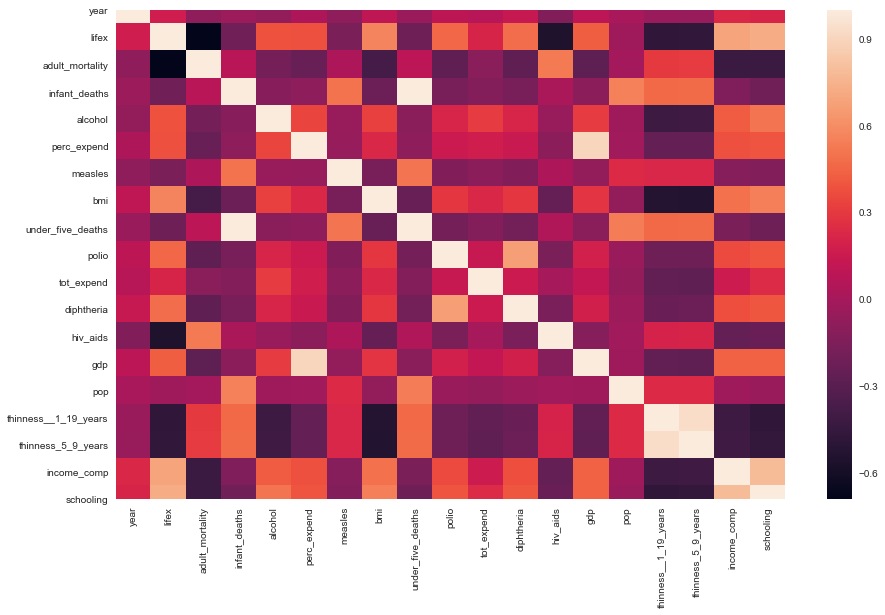

In [35]:
plt.figure(figsize = (15,9))
sns.heatmap(corr)

In [36]:
cols = ['Year', ' BMI ', 'under-five deaths ', \
        'Polio', ' HIV/AIDS', 'GDP', 'Population', \
        'Schooling', ' thinness  1-19 years', \
        'Adult Mortality', 'Life expectancy ', 'Income composition of resources', \
       'Measles ', 'Alcohol']

In [37]:
cols

['Year',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 ' HIV/AIDS',
 'GDP',
 'Population',
 'Schooling',
 ' thinness  1-19 years',
 'Adult Mortality',
 'Life expectancy ',
 'Income composition of resources',
 'Measles ',
 'Alcohol']

In [38]:
# n = 4
# row_groups= [cols[i:i+n] for i in range(0, len(cols), n) ]

In [39]:
# df2['loglife'] = np.log(df['Life expectancy '])

In [40]:
# for i in row_groups:
#     pp = sns.pairplot(data=df2, y_vars=['Life expectancy '],x_vars=i, kind="reg", height=5)

# Model Selection

## OLS Linear Method

In [41]:
# model = ols(formula = 'le~GDP+bmi', data=df2).fit()

In [42]:
# model.summary()

In [43]:
# df2['le'].describe()

## sklearn method

In [44]:
df2.columns

Index(['country', 'year', 'status', 'lifex', 'adult_mortality',
       'infant_deaths', 'alcohol', 'perc_expend', 'measles', 'bmi',
       'under_five_deaths', 'polio', 'tot_expend', 'diphtheria', 'hiv_aids',
       'gdp', 'pop', 'thinness__1_19_years', 'thinness_5_9_years',
       'income_comp', 'schooling'],
      dtype='object')

In [45]:
features = df2.drop(columns=['lifex','country','year','status'])

In [46]:
features


,adult_mortality,infant_deaths,alcohol,perc_expend,measles,bmi,under_five_deaths,polio,tot_expend,diphtheria,hiv_aids,gdp,pop,thinness__1_19_years,thinness_5_9_years,income_comp,schooling
0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,723.0,27,4.36,0.000000,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,715.0,26,4.06,0.000000,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,73.0,25,4.43,0.000000,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,686.0,25,1.72,0.000000,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Model Tuning

## Recursive Feature Elimination

In [47]:
features = df2.drop(columns=['lifex','country','year','status'])

In [48]:
target = (df2.lifex)

### Model with 5 predictors

In [49]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=5)
selector = selector.fit(features, target)

In [50]:
selector.ranking_

array([ 8,  3,  2, 10, 12,  5,  4,  7,  1,  6,  1, 11, 13,  1,  9,  1,  1])

In [51]:
i = selector.ranking_
zipped_rankings = list(zip(i, features))
best_predictors5 = []
for i in zipped_rankings:
    if i[0] == 1:
        best_predictors5.append(i[1])

In [52]:
best_predictors5

['tot_expend', 'hiv_aids', 'thinness__1_19_years', 'income_comp', 'schooling']

In [53]:
formula = '+'.join(best_predictors5)

In [54]:
formula

'tot_expend+hiv_aids+thinness__1_19_years+income_comp+schooling'

In [55]:
model = ols(formula = f'lifex~{formula}', data=df2).fit()

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lifex   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1489.
Date:                Mon, 24 Feb 2020   Prob (F-statistic):               0.00
Time:                        00:52:35   Log-Likelihood:                -8754.9
No. Observations:                2888   AIC:                         1.752e+04
Df Residuals:                    2882   BIC:                         1.756e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               48.9572      0.540     90.671      0.000      47.899      50.016
tot_expend               0.1935      0.041      4.698      0.000       0.113       0.274
hiv_aids                -0.7255      0.019    -38.075      0.000      -0.763      -0.688
thinness__1_19_years    -0.2111      0.025     -8.544      0.000      -0.260      -0.163
income_comp             10.9329      0.764     14.311      0.000       9.435      12.431
schooling                1.2038      0.051     23.556      0.000       1.104       1.304
==============================================================================
Omnibus:                      267.558   Durbin-Watson:                   0.332
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1321.841
Skew:                          -0.302   Prob(JB):                    9.24e-288
Kurtosis:                       6.259   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Train test on model with 5

In [57]:
features_5 = df2[best_predictors5]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(features_5, target, random_state=0, test_size=0.2)

In [59]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
def run_model(model, X_train, X_test, y_train, y_test):
    price_std = target.std()
    print('Training R^2 :', model.score(X_train, y_train))
    y_pred_train = model.predict(X_train)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    print('Training Root Mean Square Error', train_rmse)
    print('Training Root Mean Square Error Standardized', train_rmse/price_std)
    print('\n----------------\n')
    print('Testing R^2 :', model.score(X_test, y_test))
    y_pred_test = model.predict(X_test)
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('Testing Root Mean Square Error', test_rmse)
    print('Training Root Mean Square Error Standardized', test_rmse/price_std)

In [61]:
run_model(model, X_train, X_test, y_train, y_test)

Training R^2 : 0.7159597978465831
Training Root Mean Square Error 5.048152049002942
Training Root Mean Square Error Standardized 0.5316395534574887

----------------

Testing R^2 : 0.7382665630512384
Testing Root Mean Square Error 4.899477906892812
Training Root Mean Square Error Standardized 0.5159821299577911


### Model with 10 features

In [62]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=10)
selector = selector.fit(features, target)

In [63]:
i = selector.ranking_
zipped_rankings = list(zip(i, features))
best_predictors10 = []
for i in zipped_rankings:
    if i[0] == 1:
        best_predictors10.append(i[1])

In [64]:
selector.ranking_

array([3, 1, 1, 5, 7, 1, 1, 2, 1, 1, 1, 6, 8, 1, 4, 1, 1])

In [65]:
best_predictors10

['infant_deaths',
 'alcohol',
 'bmi',
 'under_five_deaths',
 'tot_expend',
 'diphtheria',
 'hiv_aids',
 'thinness__1_19_years',
 'income_comp',
 'schooling']

In [66]:
formula = '+'.join(best_predictors10)

In [67]:
model = ols(formula = f'lifex~{formula}', data=df2).fit()

In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lifex   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     939.5
Date:                Mon, 24 Feb 2020   Prob (F-statistic):               0.00
Time:                        00:52:35   Log-Likelihood:                -8503.1
No. Observations:                2888   AIC:                         1.703e+04
Df Residuals:                    2877   BIC:                         1.709e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               46.7946      0.553     84.591      0.000      45.710      47.879
infant_deaths            0.1104      0.009     11.801      0.000       0.092       0.129
alcohol                  0.1253      0.027      4.620      0.000       0.072       0.179
bmi                      0.0568      0.006     10.138      0.000       0.046       0.068
under_five_deaths       -0.0825      0.007    -11.971      0.000      -0.096      -0.069
tot_expend               0.0996      0.039      2.582      0.010       0.024       0.175
diphtheria               0.0557      0.004     13.578      0.000       0.048       0.064
hiv_aids                -0.6748      0.018    -37.839      0.000      -0.710      -0.640
thinness__1_19_years    -0.1007      0.027     -3.703      0.000      -0.154      -0.047
income_comp              8.2937      0.712     11.648      0.000       6.898       9.690
schooling                0.9195      0.050     18.426      0.000       0.822       1.017
==============================================================================
Omnibus:                      157.396   Durbin-Watson:                   0.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              495.846
Skew:                          -0.214   Prob(JB):                    2.13e-108
Kurtosis:                       4.984   Cond. No.                     1.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Train test on model with 10

In [69]:
features_10 = df2[best_predictors10]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(features_10, target, random_state=0, test_size=0.2)

In [71]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
def run_model(model, X_train, X_test, y_train, y_test):
    price_std = target.std()
    print('Training R^2 :', model.score(X_train, y_train))
    y_pred_train = model.predict(X_train)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    print('Training Root Mean Square Error', train_rmse)
    print('Training Root Mean Square Error Standardized', train_rmse/price_std)
    print('\n----------------\n')
    print('Testing R^2 :', model.score(X_test, y_test))
    y_pred_test = model.predict(X_test)
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('Testing Root Mean Square Error', test_rmse)
    print('Training Root Mean Square Error Standardized', test_rmse/price_std)

In [73]:
run_model(model, X_train, X_test, y_train, y_test)

Training R^2 : 0.7614047304619993
Training Root Mean Square Error 4.626722317868801
Training Root Mean Square Error Standardized 0.48725723059973797

----------------

Testing R^2 : 0.7805705528859572
Testing Root Mean Square Error 4.48608661033056
Training Root Mean Square Error Standardized 0.472446364359967


### Model with all

In [74]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=30)
selector = selector.fit(features, target)

In [75]:
i = selector.ranking_
zipped_rankings = list(zip(i, features))
best_predictorsall = []
for i in zipped_rankings:
    if i[0] == 1:
        best_predictorsall.append(i[1])

In [76]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [77]:
formula = '+'.join(best_predictorsall)

In [78]:
formula

'adult_mortality+infant_deaths+alcohol+perc_expend+measles+bmi+under_five_deaths+polio+tot_expend+diphtheria+hiv_aids+gdp+pop+thinness__1_19_years+thinness_5_9_years+income_comp+schooling'

In [79]:
model = ols(formula = f'lifex~{formula}', data=df2).fit()

In [80]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lifex   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     758.4
Date:                Mon, 24 Feb 2020   Prob (F-statistic):               0.00
Time:                        00:52:35   Log-Likelihood:                -8138.2
No. Observations:                2888   AIC:                         1.631e+04
Df Residuals:                    2870   BIC:                         1.642e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               53.4307      0.566     94.462      0.000      52.322      54.540
adult_mortality         -0.0203      0.001    -25.452      0.000      -0.022      -0.019
infant_deaths            0.0999      0.008     11.817      0.000       0.083       0.117
alcohol                  0.1157      0.024      4.759      0.000       0.068       0.163
perc_expend              0.0001   9.03e-05      1.114      0.266   -7.65e-05       0.000
measles              -2.195e-05   7.67e-06     -2.861      0.004    -3.7e-05   -6.91e-06
bmi                      0.0399      0.005      7.931      0.000       0.030       0.050
under_five_deaths       -0.0745      0.006    -12.010      0.000      -0.087      -0.062
polio                    0.0267      0.004      5.973      0.000       0.018       0.035
tot_expend               0.0698      0.035      2.019      0.044       0.002       0.138
diphtheria               0.0342      0.004      7.676      0.000       0.025       0.043
hiv_aids                -0.4671      0.018    -26.477      0.000      -0.502      -0.433
gdp                   4.115e-05   1.38e-05      2.984      0.003    1.41e-05    6.82e-05
pop                   3.102e-10   1.69e-09      0.183      0.854   -3.01e-09    3.63e-09
thinness__1_19_years    -0.0790      0.051     -1.562      0.118      -0.178       0.020
thinness_5_9_years       0.0014      0.050      0.027      0.978      -0.096       0.099
income_comp              5.7968      0.639      9.065      0.000       4.543       7.051
schooling                0.7462      0.045     16.702      0.000       0.659       0.834
==============================================================================
Omnibus:                      146.311   Durbin-Watson:                   0.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.184
Skew:                          -0.239   Prob(JB):                     6.28e-89
Kurtosis:                       4.774   Cond. No.                     4.81e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.81e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Train test on model all

In [81]:
features_all = df2[best_predictorsall]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(features_all, target, random_state=0, test_size=0.2)

In [83]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
def run_model(model, X_train, X_test, y_train, y_test):
    price_std = target.std()
    print('Training R^2 :', model.score(X_train, y_train))
    y_pred_train = model.predict(X_train)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    print('Training Root Mean Square Error', train_rmse)
    print('Training Root Mean Square Error Standardized', train_rmse/price_std)
    print('\n----------------\n')
    print('Testing R^2 :', model.score(X_test, y_test))
    y_pred_test = model.predict(X_test)
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('Testing Root Mean Square Error', test_rmse)
    print('Training Root Mean Square Error Standardized', test_rmse/price_std)

In [85]:
run_model(model, X_train, X_test, y_train, y_test)

Training R^2 : 0.8142386714414563
Training Root Mean Square Error 4.0824434252081385
Training Root Mean Square Error Standardized 0.4299372084130841

----------------

Testing R^2 : 0.8304982816271845
Testing Root Mean Square Error 3.9428227363792043
Training Root Mean Square Error Standardized 0.4152332375457442


### Model with dummies BEST MODEL

In [86]:
cou_dum = pd.get_dummies(df2.country)

In [87]:
df3 = pd.concat([df2, cou_dum], axis='columns')

In [88]:
df3.status = np.where(df3.status=='Developing', 0,1)

In [89]:
df3 = df3.drop(columns=['country', 'Angola'], axis=1)

In [90]:
df3

,year,status,lifex,adult_mortality,infant_deaths,alcohol,perc_expend,measles,bmi,under_five_deaths,polio,tot_expend,diphtheria,hiv_aids,gdp,pop,thinness__1_19_years,thinness_5_9_years,income_comp,schooling,Afghanistan,Albania,Algeria,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo,Costa Rica,Croatia,Cuba,Cyprus,Czechia,Côte d'Ivoire,Democratic People's Republic of Korea,Democratic Republic of the Congo,Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,India,Indonesia,Iran (Islamic Republic of),Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Lao People's Democratic Republic,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Micronesia (Federated States of),Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Republic of Korea,Republic of Moldova,Romania,Russian Federation,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,Samoa,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,Spain,Sri Lanka,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,The former Yugoslav republic of Macedonia,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,2015,0,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2014,0,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2013,0,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,0,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [91]:
features = df3.drop(columns='lifex')

In [92]:
renamed = []
for i in features.columns:
    renamed.append(i.lower().strip().replace(' ', '_').replace('-','_').replace('/','_').replace('(','_').replace(')','_').replace("'",'_'))

In [93]:
rename_dict = dict(zip(features.columns, renamed))

In [94]:
rename_dict

{'year': 'year',
 'status': 'status',
 'adult_mortality': 'adult_mortality',
 'infant_deaths': 'infant_deaths',
 'alcohol': 'alcohol',
 'perc_expend': 'perc_expend',
 'measles': 'measles',
 'bmi': 'bmi',
 'under_five_deaths': 'under_five_deaths',
 'polio': 'polio',
 'tot_expend': 'tot_expend',
 'diphtheria': 'diphtheria',
 'hiv_aids': 'hiv_aids',
 'gdp': 'gdp',
 'pop': 'pop',
 'thinness__1_19_years': 'thinness__1_19_years',
 'thinness_5_9_years': 'thinness_5_9_years',
 'income_comp': 'income_comp',
 'schooling': 'schooling',
 'Afghanistan': 'afghanistan',
 'Albania': 'albania',
 'Algeria': 'algeria',
 'Antigua and Barbuda': 'antigua_and_barbuda',
 'Argentina': 'argentina',
 'Armenia': 'armenia',
 'Australia': 'australia',
 'Austria': 'austria',
 'Azerbaijan': 'azerbaijan',
 'Bahamas': 'bahamas',
 'Bahrain': 'bahrain',
 'Bangladesh': 'bangladesh',
 'Barbados': 'barbados',
 'Belarus': 'belarus',
 'Belgium': 'belgium',
 'Belize': 'belize',
 'Benin': 'benin',
 'Bhutan': 'bhutan',
 'Bolivia

In [95]:
features.rename(columns=rename_dict, inplace=True)

In [96]:
shorten = {'life_expectancy':'lifex', \
           'percentage_expenditure':'perc_expend', \
           'total_expenditure':'tot_expend', \
          'population':'pop','income_composition_of_resources':'income_comp'}

In [97]:
features.rename(columns=shorten, inplace=True)

In [98]:
features

,year,status,adult_mortality,infant_deaths,alcohol,perc_expend,measles,bmi,under_five_deaths,polio,tot_expend,diphtheria,hiv_aids,gdp,pop,thinness__1_19_years,thinness_5_9_years,income_comp,schooling,afghanistan,albania,algeria,antigua_and_barbuda,argentina,armenia,australia,austria,azerbaijan,bahamas,bahrain,bangladesh,barbados,belarus,belgium,belize,benin,bhutan,bolivia__plurinational_state_of_,bosnia_and_herzegovina,botswana,brazil,brunei_darussalam,bulgaria,burkina_faso,burundi,cabo_verde,cambodia,cameroon,canada,central_african_republic,chad,chile,china,colombia,comoros,congo,costa_rica,croatia,cuba,cyprus,czechia,côte_d_ivoire,democratic_people_s_republic_of_korea,democratic_republic_of_the_congo,denmark,djibouti,dominican_republic,ecuador,egypt,el_salvador,equatorial_guinea,eritrea,estonia,ethiopia,fiji,finland,france,gabon,gambia,georgia,germany,ghana,greece,grenada,guatemala,guinea,guinea_bissau,guyana,haiti,honduras,hungary,iceland,india,indonesia,iran__islamic_republic_of_,iraq,ireland,israel,italy,jamaica,japan,jordan,kazakhstan,kenya,kiribati,kuwait,kyrgyzstan,lao_people_s_democratic_republic,latvia,lebanon,lesotho,liberia,libya,lithuania,luxembourg,madagascar,malawi,malaysia,maldives,mali,malta,mauritania,mauritius,mexico,micronesia__federated_states_of_,mongolia,montenegro,morocco,mozambique,myanmar,namibia,nepal,netherlands,new_zealand,nicaragua,niger,nigeria,norway,oman,pakistan,panama,papua_new_guinea,paraguay,peru,philippines,poland,portugal,qatar,republic_of_korea,republic_of_moldova,romania,russian_federation,rwanda,saint_lucia,saint_vincent_and_the_grenadines,samoa,sao_tome_and_principe,saudi_arabia,senegal,serbia,seychelles,sierra_leone,singapore,slovakia,slovenia,solomon_islands,somalia,south_africa,spain,sri_lanka,suriname,swaziland,sweden,switzerland,syrian_arab_republic,tajikistan,thailand,the_former_yugoslav_republic_of_macedonia,timor_leste,togo,tonga,trinidad_and_tobago,tunisia,turkey,turkmenistan,uganda,ukraine,united_arab_emirates,united_kingdom_of_great_britain_and_northern_ireland,united_republic_of_tanzania,united_states_of_america,uruguay,uzbekistan,vanuatu,venezuela__bolivarian_republic_of_,viet_nam,yemen,zambia,zimbabwe
0,2015,0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2014,0,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2013,0,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,0,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [99]:
features_with_life = features.copy()

In [100]:
features_with_life['lifex'] = df3.lifex

In [101]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=199)
selector = selector.fit(features, target)

In [102]:
i = selector.ranking_
zipped_rankings = list(zip(i, features))
best_predictors_dum = []
for i in zipped_rankings:
    if i[0] == 1:
        best_predictors_dum.append(i[1])

In [103]:
formula = '+'.join(best_predictors_dum)

In [104]:
best_predictors_dum

['year',
 'status',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'perc_expend',
 'measles',
 'bmi',
 'under_five_deaths',
 'polio',
 'tot_expend',
 'diphtheria',
 'hiv_aids',
 'gdp',
 'pop',
 'thinness__1_19_years',
 'thinness_5_9_years',
 'income_comp',
 'schooling',
 'afghanistan',
 'albania',
 'algeria',
 'antigua_and_barbuda',
 'argentina',
 'armenia',
 'australia',
 'austria',
 'azerbaijan',
 'bahamas',
 'bahrain',
 'bangladesh',
 'barbados',
 'belarus',
 'belgium',
 'belize',
 'benin',
 'bhutan',
 'bolivia__plurinational_state_of_',
 'bosnia_and_herzegovina',
 'botswana',
 'brazil',
 'brunei_darussalam',
 'bulgaria',
 'burkina_faso',
 'burundi',
 'cabo_verde',
 'cambodia',
 'cameroon',
 'canada',
 'central_african_republic',
 'chad',
 'chile',
 'china',
 'colombia',
 'comoros',
 'congo',
 'costa_rica',
 'croatia',
 'cuba',
 'cyprus',
 'czechia',
 'côte_d_ivoire',
 'democratic_people_s_republic_of_korea',
 'democratic_republic_of_the_congo',
 'denmark',
 'djibouti',
 'domini

#### Train test on model dummies

In [105]:
formula

'year+status+adult_mortality+infant_deaths+alcohol+perc_expend+measles+bmi+under_five_deaths+polio+tot_expend+diphtheria+hiv_aids+gdp+pop+thinness__1_19_years+thinness_5_9_years+income_comp+schooling+afghanistan+albania+algeria+antigua_and_barbuda+argentina+armenia+australia+austria+azerbaijan+bahamas+bahrain+bangladesh+barbados+belarus+belgium+belize+benin+bhutan+bolivia__plurinational_state_of_+bosnia_and_herzegovina+botswana+brazil+brunei_darussalam+bulgaria+burkina_faso+burundi+cabo_verde+cambodia+cameroon+canada+central_african_republic+chad+chile+china+colombia+comoros+congo+costa_rica+croatia+cuba+cyprus+czechia+côte_d_ivoire+democratic_people_s_republic_of_korea+democratic_republic_of_the_congo+denmark+djibouti+dominican_republic+ecuador+egypt+el_salvador+equatorial_guinea+eritrea+estonia+ethiopia+fiji+finland+france+gabon+gambia+georgia+germany+ghana+greece+grenada+guatemala+guinea+guinea_bissau+guyana+haiti+honduras+hungary+iceland+india+indonesia+iran__islamic_republic_of_+i

In [106]:
model = ols(formula = f'lifex~{formula}', data=features_with_life).fit()

In [107]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lifex   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     361.2
Date:                Mon, 24 Feb 2020   Prob (F-statistic):               0.00
Time:                        00:52:36   Log-Likelihood:                -5806.9
No. Observations:                2888   AIC:                         1.201e+04
Df Residuals:                    2689   BIC:                         1.320e+04
Df Model:                         198                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                             -468.4540     21.375    -21.916      0.000    -510.368    -426.540
year                                                     0.2584      0.011     24.088      0.000       0.237       0.279
status                                                  25.9201      0.611     42.399      0.000      24.721      27.119
adult_mortality                                         -0.0020      0.000     -4.398      0.000      -0.003      -0.001
infant_deaths                                            0.0855      0.011      7.728      0.000       0.064       0.107
alcohol                                                 -0.0577      0.023     -2.489      0.013      -0.103      -0.012
perc_expend                                              0.0001      5e-05      2.731      0.006    3.85e-05       0.000
measles                                              -1.164e-05   4.31e-06     -2.701      0.007   -2.01e-05   -3.19e-06
bmi                                                     -0.0034      0.003     -1.167      0.243      -0.009       0.002
under_five_deaths                                       -0.0628      0.008     -8.128      0.000      -0.078      -0.048
polio                                                    0.0049      0.002      2.168      0.030       0.000       0.009
tot_expend                                              -0.0406      0.022     -1.823      0.068      -0.084       0.003
diphtheria                                               0.0052      0.002      2.279      0.023       0.001       0.010
hiv_aids                                                -0.3265      0.015    -21.770      0.000      -0.356      -0.297
gdp                                                  -1.756e-05    7.8e-06     -2.251      0.024   -3.29e-05   -2.26e-06
pop                                                  -4.811e-10    8.3e-10     -0.579      0.562   -2.11e-09    1.15e-09
thinness__1_19_years                                     0.0202      0.028      0.724      0.469      -0.034       0.075
thinness_5_9_years                                       0.0206      0.028      0.745      0.456      -0.034       0.075
income_comp                                             -0.1559      0.429     -0.363      0.716      -0.997       0.686
schooling                                                0.1628      0.044      3.709      0.000       0.077       0.249
afghanistan                                              6.5560      0.740      8.865      0.000       5.106       8.006
albania                                                 22.7958      0.733     31.108      0.000      21.359      24.233
algeria                                                 20

In [108]:
features_dum = features[best_predictors_dum]

In [109]:
X_train, X_test, y_train, y_test = train_test_split(features_dum, target, random_state=2, test_size=0.2)

In [110]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
def run_model(model, X_train, X_test, y_train, y_test):
    price_std = target.std()
    print('Training R^2 :', model.score(X_train, y_train))
    y_pred_train = model.predict(X_train)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    print('Training Root Mean Square Error', train_rmse)
    print('Training Root Mean Square Error Standardized', train_rmse/price_std)
    print('\n----------------\n')
    print('Testing R^2 :', model.score(X_test, y_test))
    y_pred_test = model.predict(X_test)
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('Testing Root Mean Square Error', test_rmse)
    print('Training Root Mean Square Error Standardized', test_rmse/price_std)

In [112]:
run_model(model, X_train, X_test, y_train, y_test)

Training R^2 : 0.9667355273146165
Training Root Mean Square Error 1.7223779349314652
Training Root Mean Square Error Standardized 0.18138998733068112

----------------

Testing R^2 : 0.9486844150946028
Testing Root Mean Square Error 2.194733385393005
Training Root Mean Square Error Standardized 0.23113548594461117


##### Prediction Investigations

In [113]:
testonerow= pd.DataFrame(features_dum.iloc[29]).transpose()

In [114]:
testonerow

,year,status,adult_mortality,infant_deaths,alcohol,perc_expend,measles,bmi,under_five_deaths,polio,tot_expend,diphtheria,hiv_aids,gdp,pop,thinness__1_19_years,thinness_5_9_years,income_comp,schooling,afghanistan,albania,algeria,antigua_and_barbuda,argentina,armenia,australia,austria,azerbaijan,bahamas,bahrain,bangladesh,barbados,belarus,belgium,belize,benin,bhutan,bolivia__plurinational_state_of_,bosnia_and_herzegovina,botswana,brazil,brunei_darussalam,bulgaria,burkina_faso,burundi,cabo_verde,cambodia,cameroon,canada,central_african_republic,chad,chile,china,colombia,comoros,congo,costa_rica,croatia,cuba,cyprus,czechia,côte_d_ivoire,democratic_people_s_republic_of_korea,democratic_republic_of_the_congo,denmark,djibouti,dominican_republic,ecuador,egypt,el_salvador,equatorial_guinea,eritrea,estonia,ethiopia,fiji,finland,france,gabon,gambia,georgia,germany,ghana,greece,grenada,guatemala,guinea,guinea_bissau,guyana,haiti,honduras,hungary,iceland,india,indonesia,iran__islamic_republic_of_,iraq,ireland,israel,italy,jamaica,japan,jordan,kazakhstan,kenya,kiribati,kuwait,kyrgyzstan,lao_people_s_democratic_republic,latvia,lebanon,lesotho,liberia,libya,lithuania,luxembourg,madagascar,malawi,malaysia,maldives,mali,malta,mauritania,mauritius,mexico,micronesia__federated_states_of_,mongolia,montenegro,morocco,mozambique,myanmar,namibia,nepal,netherlands,new_zealand,nicaragua,niger,nigeria,norway,oman,pakistan,panama,papua_new_guinea,paraguay,peru,philippines,poland,portugal,qatar,republic_of_korea,republic_of_moldova,romania,russian_federation,rwanda,saint_lucia,saint_vincent_and_the_grenadines,samoa,sao_tome_and_principe,saudi_arabia,senegal,serbia,seychelles,sierra_leone,singapore,slovakia,slovenia,solomon_islands,somalia,south_africa,spain,sri_lanka,suriname,swaziland,sweden,switzerland,syrian_arab_republic,tajikistan,thailand,the_former_yugoslav_republic_of_macedonia,timor_leste,togo,tonga,trinidad_and_tobago,tunisia,turkey,turkmenistan,uganda,ukraine,united_arab_emirates,united_kingdom_of_great_britain_and_northern_ireland,united_republic_of_tanzania,united_states_of_america,uruguay,uzbekistan,vanuatu,venezuela__bolivarian_republic_of_,viet_nam,yemen,zambia,zimbabwe
29,2002.0,0.0,15.0,1.0,3.73,104.516916,16.0,46.9,1.0,98.0,6.3,98.0,0.1,1453.642777,3511.0,2.0,2.1,0.67,10.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
model.predict(testonerow)

array([73.63840435])

In [116]:
df2.iloc[29].lifex

73.3

In [117]:
testonerow= pd.DataFrame(features_dum.iloc[55]).transpose()

In [118]:
testonerow

,year,status,adult_mortality,infant_deaths,alcohol,perc_expend,measles,bmi,under_five_deaths,polio,tot_expend,diphtheria,hiv_aids,gdp,pop,thinness__1_19_years,thinness_5_9_years,income_comp,schooling,afghanistan,albania,algeria,antigua_and_barbuda,argentina,armenia,australia,austria,azerbaijan,bahamas,bahrain,bangladesh,barbados,belarus,belgium,belize,benin,bhutan,bolivia__plurinational_state_of_,bosnia_and_herzegovina,botswana,brazil,brunei_darussalam,bulgaria,burkina_faso,burundi,cabo_verde,cambodia,cameroon,canada,central_african_republic,chad,chile,china,colombia,comoros,congo,costa_rica,croatia,cuba,cyprus,czechia,côte_d_ivoire,democratic_people_s_republic_of_korea,democratic_republic_of_the_congo,denmark,djibouti,dominican_republic,ecuador,egypt,el_salvador,equatorial_guinea,eritrea,estonia,ethiopia,fiji,finland,france,gabon,gambia,georgia,germany,ghana,greece,grenada,guatemala,guinea,guinea_bissau,guyana,haiti,honduras,hungary,iceland,india,indonesia,iran__islamic_republic_of_,iraq,ireland,israel,italy,jamaica,japan,jordan,kazakhstan,kenya,kiribati,kuwait,kyrgyzstan,lao_people_s_democratic_republic,latvia,lebanon,lesotho,liberia,libya,lithuania,luxembourg,madagascar,malawi,malaysia,maldives,mali,malta,mauritania,mauritius,mexico,micronesia__federated_states_of_,mongolia,montenegro,morocco,mozambique,myanmar,namibia,nepal,netherlands,new_zealand,nicaragua,niger,nigeria,norway,oman,pakistan,panama,papua_new_guinea,paraguay,peru,philippines,poland,portugal,qatar,republic_of_korea,republic_of_moldova,romania,russian_federation,rwanda,saint_lucia,saint_vincent_and_the_grenadines,samoa,sao_tome_and_principe,saudi_arabia,senegal,serbia,seychelles,sierra_leone,singapore,slovakia,slovenia,solomon_islands,somalia,south_africa,spain,sri_lanka,suriname,swaziland,sweden,switzerland,syrian_arab_republic,tajikistan,thailand,the_former_yugoslav_republic_of_macedonia,timor_leste,togo,tonga,trinidad_and_tobago,tunisia,turkey,turkmenistan,uganda,ukraine,united_arab_emirates,united_kingdom_of_great_britain_and_northern_ireland,united_republic_of_tanzania,united_states_of_america,uruguay,uzbekistan,vanuatu,venezuela__bolivarian_republic_of_,viet_nam,yemen,zambia,zimbabwe
55,2008.0,0.0,371.0,84.0,7.07,249.910196,265.0,19.3,133.0,65.0,3.84,69.0,2.6,3868.578883,2175942.0,9.5,9.4,0.468,8.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
model.predict(testonerow)

array([49.51484731])

In [120]:
df2.iloc[55].lifex

48.7

### Model with every possible interaction

In [121]:
features = df2.drop(columns=['lifex','country','year','status'])

In [122]:
target = (df2.lifex)

In [123]:
cols = list(features.columns)

In [124]:
dfex = pd.DataFrame()

In [125]:
for i in cols:
    colsrem = features.drop(columns=i, axis=1)
    for x in colsrem:
        dfex[f'{i}_{x}'] = features[i]*features[x]

In [126]:
dfex

,adult_mortality_infant_deaths,adult_mortality_alcohol,adult_mortality_perc_expend,adult_mortality_measles,adult_mortality_bmi,adult_mortality_under_five_deaths,adult_mortality_polio,adult_mortality_tot_expend,adult_mortality_diphtheria,adult_mortality_hiv_aids,adult_mortality_gdp,adult_mortality_pop,adult_mortality_thinness__1_19_years,adult_mortality_thinness_5_9_years,adult_mortality_income_comp,adult_mortality_schooling,infant_deaths_adult_mortality,infant_deaths_alcohol,infant_deaths_perc_expend,infant_deaths_measles,infant_deaths_bmi,infant_deaths_under_five_deaths,infant_deaths_polio,infant_deaths_tot_expend,infant_deaths_diphtheria,infant_deaths_hiv_aids,infant_deaths_gdp,infant_deaths_pop,infant_deaths_thinness__1_19_years,infant_deaths_thinness_5_9_years,infant_deaths_income_comp,infant_deaths_schooling,alcohol_adult_mortality,alcohol_infant_deaths,alcohol_perc_expend,alcohol_measles,alcohol_bmi,alcohol_under_five_deaths,alcohol_polio,alcohol_tot_expend,alcohol_diphtheria,alcohol_hiv_aids,alcohol_gdp,alcohol_pop,alcohol_thinness__1_19_years,alcohol_thinness_5_9_years,alcohol_income_comp,alcohol_schooling,perc_expend_adult_mortality,perc_expend_infant_deaths,perc_expend_alcohol,perc_expend_measles,perc_expend_bmi,perc_expend_under_five_deaths,perc_expend_polio,perc_expend_tot_expend,perc_expend_diphtheria,perc_expend_hiv_aids,perc_expend_gdp,perc_expend_pop,perc_expend_thinness__1_19_years,perc_expend_thinness_5_9_years,perc_expend_income_comp,perc_expend_schooling,measles_adult_mortality,measles_infant_deaths,measles_alcohol,measles_perc_expend,measles_bmi,measles_under_five_deaths,measles_polio,measles_tot_expend,measles_diphtheria,measles_hiv_aids,measles_gdp,measles_pop,measles_thinness__1_19_years,measles_thinness_5_9_years,measles_income_comp,measles_schooling,bmi_adult_mortality,bmi_infant_deaths,bmi_alcohol,bmi_perc_expend,bmi_measles,bmi_under_five_deaths,bmi_polio,bmi_tot_expend,bmi_diphtheria,bmi_hiv_aids,bmi_gdp,bmi_pop,bmi_thinness__1_19_years,bmi_thinness_5_9_years,bmi_income_comp,bmi_schooling,under_five_deaths_adult_mortality,under_five_deaths_infant_deaths,under_five_deaths_alcohol,under_five_deaths_perc_expend,under_five_deaths_measles,under_five_deaths_bmi,under_five_deaths_polio,under_five_deaths_tot_expend,under_five_deaths_diphtheria,under_five_deaths_hiv_aids,under_five_deaths_gdp,under_five_deaths_pop,under_five_deaths_thinness__1_19_years,under_five_deaths_thinness_5_9_years,under_five_deaths_income_comp,under_five_deaths_schooling,polio_adult_mortality,polio_infant_deaths,polio_alcohol,polio_perc_expend,polio_measles,polio_bmi,polio_under_five_deaths,polio_tot_expend,polio_diphtheria,polio_hiv_aids,polio_gdp,polio_pop,polio_thinness__1_19_years,polio_thinness_5_9_years,polio_income_comp,polio_schooling,tot_expend_adult_mortality,tot_expend_infant_deaths,tot_expend_alcohol,tot_expend_perc_expend,tot_expend_measles,tot_expend_bmi,tot_expend_under_five_deaths,tot_expend_polio,tot_expend_diphtheria,tot_expend_hiv_aids,tot_expend_gdp,tot_expend_pop,tot_expend_thinness__1_19_years,tot_expend_thinness_5_9_years,tot_expend_income_comp,tot_expend_schooling,diphtheria_adult_mortality,diphtheria_infant_deaths,diphtheria_alcohol,diphtheria_perc_expend,diphtheria_measles,diphtheria_bmi,diphtheria_under_five_deaths,diphtheria_polio,diphtheria_tot_expend,diphtheria_hiv_aids,diphtheria_gdp,diphtheria_pop,diphtheria_thinness__1_19_years,diphtheria_thinness_5_9_years,diphtheria_income_comp,diphtheria_schooling,hiv_aids_adult_mortality,hiv_aids_infant_deaths,hiv_aids_alcohol,hiv_aids_perc_expend,hiv_aids_measles,hiv_aids_bmi,hiv_aids_under_five_deaths,hiv_aids_polio,hiv_aids_tot_expend,hiv_aids_diphtheria,hiv_aids_gdp,hiv_aids_pop,hiv_aids_thinness__1_19_years,hiv_aids_thinness_5_9_years,hiv_aids_income_comp,hiv_aids_schooling,gdp_adult_mortality,gdp_infant_deaths,gdp_alcohol,gdp_perc_expend,gdp_measles,gdp_bmi,gdp_under_five_deaths,gdp_polio,gdp_tot_expend,gdp_diphtheria,gdp_hiv_aids,gdp_pop,gdp_thinness__1_19

In [127]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=300)
selector = selector.fit(dfex, target)

In [128]:
i = selector.ranking_
zipped_rankings = list(zip(i, dfex))
best_predictorsex = []
for i in zipped_rankings:
    if i[0] == 1:
        best_predictorsex.append(i[1])

In [129]:
formula = '+'.join(best_predictorsex)

In [130]:
dfexd = dfex.copy()

In [131]:
dfexd['lifex'] = df2['lifex']

In [132]:
model = ols(formula = f'lifex~{formula}', data=dfexd).fit()

In [133]:
features_all = dfex[best_predictorsex]

#### Train test on model every interaction

In [134]:
X_train, X_test, y_train, y_test = train_test_split(features_all, target, random_state=1, test_size=0.2)

In [135]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [136]:
def run_model(model, X_train, X_test, y_train, y_test):
    price_std = target.std()
    print('Training R^2 :', model.score(X_train, y_train))
    y_pred_train = model.predict(X_train)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    print('Training Root Mean Square Error', train_rmse)
    print('Training Root Mean Square Error Standardized', train_rmse/price_std)
    print('\n----------------\n')
    print('Testing R^2 :', model.score(X_test, y_test))
    y_pred_test = model.predict(X_test)
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('Testing Root Mean Square Error', test_rmse)
    print('Training Root Mean Square Error Standardized', test_rmse/price_std)

In [137]:
run_model(model, X_train, X_test, y_train, y_test)

Training R^2 : 0.8594179062958387
Training Root Mean Square Error 3.570061021745132
Training Root Mean Square Error Standardized 0.3759763234135228

----------------

Testing R^2 : 0.8184574406354057
Testing Root Mean Square Error 3.9972850495820116
Training Root Mean Square Error Standardized 0.4209688650764405


### Model with only bmi

In [138]:
model = ols(formula = f'lifex~bmi', data=df2).fit()

In [139]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lifex   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     1368.
Date:                Mon, 24 Feb 2020   Prob (F-statistic):          1.98e-245
Time:                        00:52:38   Log-Likelihood:                -10038.
No. Observations:                2888   AIC:                         2.008e+04
Df Residuals:                    2886   BIC:                         2.009e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.0402      0.314    187.748      0.000      58.424      59.657
bmi            0.2697      0.007     36.984      0.000       0.255       0.284
==============================================================================
Omnibus:                       27.983   Durbin-Watson:                   0.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.041
Skew:                          -0.012   Prob(JB):                     1.66e-10
Kurtosis:                       3.611   Cond. No.                         93.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Train test on model with only bmi

In [140]:
features_bmi = pd.DataFrame(df2['bmi'])

X_train, X_test, y_train, y_test = train_test_split(features_bmi, target, random_state=0, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

def run_model(model, X_train, X_test, y_train, y_test):
    price_std = target.std()
    print('Training R^2 :', model.score(X_train, y_train))
    y_pred_train = model.predict(X_train)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    print('Training Root Mean Square Error', train_rmse)
    print('Training Root Mean Square Error Standardized', train_rmse/price_std)
    print('\n----------------\n')
    print('Testing R^2 :', model.score(X_test, y_test))
    y_pred_test = model.predict(X_test)
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('Testing Root Mean Square Error', test_rmse)
    print('Training Root Mean Square Error Standardized', test_rmse/price_std)

run_model(model, X_train, X_test, y_train, y_test)

Training R^2 : 0.3221066808526717
Training Root Mean Square Error 7.798717659112068
Training Root Mean Square Error Standardized 0.8213117856959691

----------------

Testing R^2 : 0.31867324597949503
Testing Root Mean Square Error 7.904928044261211
Training Root Mean Square Error Standardized 0.8324971939770827


# Random and scratch

In [ ]:
#import the metrics module from sklearn
from sklearn import metrics

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


print('Train Root Mean Squared Error:' , train_rmse)
print('Test Root Mean Squared Error:' , test_rmse)

In [ ]:
price_std = target.std()

print('Train Root Mean Squared Error:' , train_rmse/price_std)
print('Test Root Mean Squared Error:', test_rmse/price_std )


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
cv_20_results = np.mean(cross_val_score(linreg, features, target, cv=20, scoring='neg_mean_squared_error'))

In [ ]:
cv_20_results

In [ ]:
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

In [ ]:
print('Root Mean Squared Error:' , test_rmse)

In [ ]:
print('Root Mean Squared Error:' , test_rmse/price_std)

In [ ]:
lm = lm.fit(features, target)

In [ ]:
lm